In [1]:
# Trends
# 1) The more total rides in a city, the higher the number of drivers.
# 2) The more drivers, the lower the average fare per ride.
# 3) There is a negative correlation between the total number of rides in a city and the average fare per ride.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
#Import csv files
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [4]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Rename dataframes
ride_city = ride_df.groupby('city')
city = city_df.set_index('city')

# Average fare by city
avg_fare = ride_city['fare'].mean()

# Total rides
total_rides = ride_city['ride_id'].count()

# Number of drivers
total_drivers = city['driver_count']

# City types
city_types = city['type']

In [7]:
# Building dataframe
totes_df = pd.concat([avg_fare, 
                       total_rides, 
                       total_drivers, 
                       city_types],
                     axis = 1)
totes_df = totes_df.rename(columns={'fare' : 'Average Fare ($)',
                                   'ride_id' : 'Total Number of Rides (Per City)',
                                   'driver_count' : 'driver count per city',
                                   'type' : 'City Types'})

In [8]:
# Separating city types
urban_df = totes_df.loc[totes_df['City Types'] == 'Urban']
sub_df = totes_df.loc[totes_df['City Types'] == 'Suburban']
rural_df = totes_df.loc[totes_df['City Types'] == 'Rural']

# Size of bubbles based on driver population
area1 = urban_df['driver count per city'] * 20
area2 = sub_df['driver count per city'] * 20
area3 = rural_df['driver count per city'] * 20

Text(0,0.5,'Average Fare ($)')

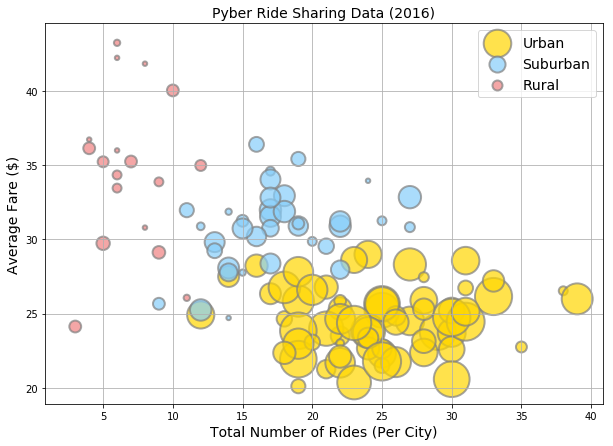

In [22]:
# City type scatter plots, by color
ax1 = urban_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area1, color='gold', edgecolor='gray', alpha=0.7, label='Urban', LineWidth = 2, figsize=(10,7))    
ax2 = sub_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area2, color='lightskyblue', edgecolor='gray', alpha=0.7, ax=ax1, label='Suburban', LineWidth = 2)    
ax3 = rural_df.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=area3, color='lightcoral', edgecolor='gray', alpha=0.7, ax=ax1, label='Rural', LineWidth = 2)

# Plot formatting
plt.legend(fontsize=14)
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)', fontsize=14)
plt.xlabel('Total Number of Rides (Per City)', fontsize=14)
plt.ylabel('Average Fare ($)', fontsize=14)

([<matplotlib.patches.Wedge at 0x2d19274c320>,
 [Text(-1.58441,0.643224,'Urban'),
  Text(1.41168,-0.965019,'Suburban'),
  Text(1.43835,0.924798,'Rural')],
 [Text(-0.889495,0.361108,'62.7%'),
  Text(0.792522,-0.541765,'30.5%'),
  Text(0.807494,0.519185,'6.8%')])

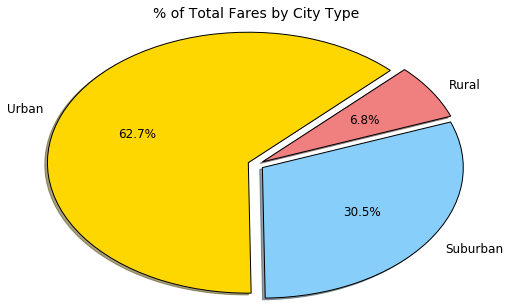

In [28]:
city_type = city_df.set_index('city')
pie_df = ride_df.join(city_type, on='city')

# Set fare sums for data
pie_urban = pie_df.loc[pie_df['type'] == 'Urban']
pie_urban = pie_urban.groupby('type')
fare_urban = pie_urban['fare'].sum()
pie_sub = pie_df.loc[pie_df['type'] == 'Suburban']
pie_sub = pie_sub.groupby('type')
fare_sub = pie_sub['fare'].sum()
pie_rural = pie_df.loc[pie_df['type'] == 'Rural']
pie_rural = pie_rural.groupby('type')
fare_rural = pie_rural['fare'].sum()

#Label pie chart
fare_labels = ['Urban', 'Suburban', 'Rural']
fare_totals = pd.Series([fare_urban, fare_sub, fare_rural])
colors = ['gold', 'lightskyblue', 'lightcoral']
wedge = {'edgecolor' : 'black'}
text = {'fontsize' : 12}
explode = (.06,.06,.06)

# Pie chart
plt.title('% of Total Fares by City Type', y=1.15, fontsize=14)
plt.pie(fare_totals, radius=1.5, textprops=text,  labels=fare_labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=8, startangle=45, wedgeprops=wedge)

([<matplotlib.patches.Wedge at 0x2d19171c6d8>,
 [Text(-0.957159,1.46504,'Urban'),
  Text(0.702967,-1.6026,'Suburban'),
  Text(1.72613,-0.28804,'Rural')],
 [Text(-0.546948,0.837166,'68.4%'),
  Text(0.401695,-0.915773,'26.3%'),
  Text(0.986361,-0.164595,'5.3%')])

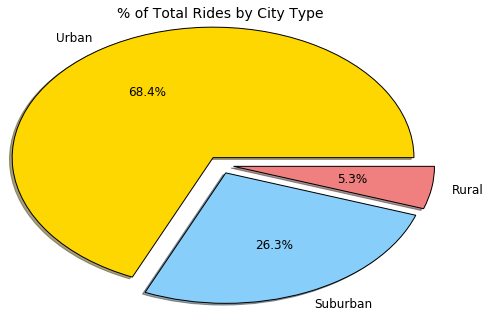

In [27]:
# Percent of fares by city
rides_urban  = pie_urban['fare'].count()
rides_sub = pie_sub['fare'].count()
rides_rural = pie_rural['fare'].count()

# Chart labels
ride_labels = ['Urban', 'Suburban', 'Rural']
ride_totals = [rides_urban, rides_sub, rides_rural]
explode_fare = (.1,.1,.1)

# Pie chart
plt.title('% of Total Rides by City Type', y=1.15, fontsize=14)
plt.pie(ride_totals, radius=1.5, textprops=text,  labels=ride_labels, explode=explode_fare, colors=colors,
        autopct="%1.1f%%", shadow=8, wedgeprops=wedge)

([<matplotlib.patches.Wedge at 0x2d1916c9eb8>,
 [Text(1.29908,1.898,'Urban'),
  Text(-1.45093,-1.7846,'Suburban'),
  Text(-0.189359,-2.29219,'Rural')],
 [Text(0.734261,1.07278,'80.9%'),
  Text(-0.82009,-1.00869,'16.5%'),
  Text(-0.107029,-1.29559,'2.6%')])

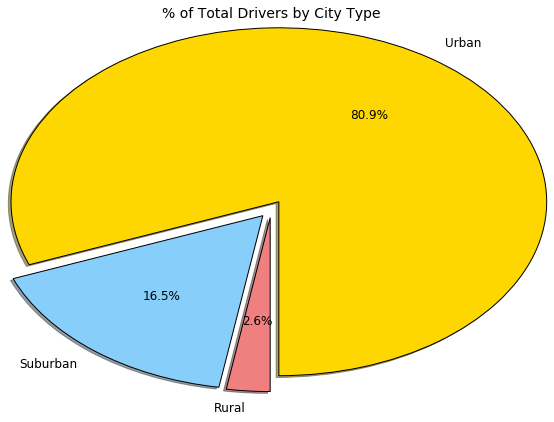

In [26]:
# Drivers by city type
drivers_df = city_df.groupby('type')
drivers_total = drivers_df['driver_count'].sum()

# Label ye olde chart
drivers_labels = ['Urban', 'Suburban', 'Rural']
drivers_totals = [drivers_total['Urban'], drivers_total['Suburban'], drivers_total['Rural']]

# Pie chart
plt.title('% of Total Drivers by City Type', y=1.35, fontsize=14)
plt.pie(drivers_totals, radius=2, textprops=text, wedgeprops=wedge, labels=drivers_labels, explode=explode_fare, colors=colors,
        autopct="%1.1f%%", startangle=270, shadow=8)